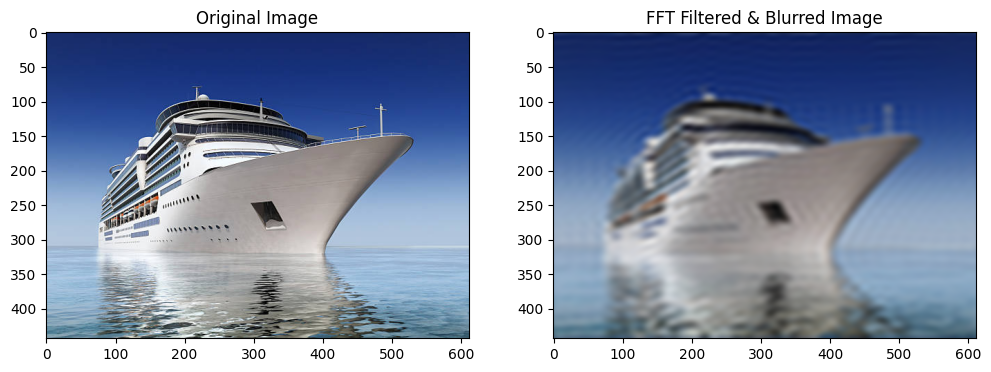

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("/content/Image1.jpg")  # Change to your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

# Function to apply FFT filtering on each channel
def apply_fft_filter(img_channel):
    dft = np.fft.fft2(img_channel)  # Compute FFT
    dft_shift = np.fft.fftshift(dft)  # Shift the zero-frequency component to center

    # Create a low-pass filter mask
    rows, cols = img_channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Adjust for strength

    # Apply mask and inverse FFT
    dft_shift *= mask
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(dft_ishift)
    img_back = np.abs(img_back)

    # Normalize to 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return img_back

# Apply FFT filtering to each channel (R, G, B)
r, g, b = cv2.split(image)
r_filtered = apply_fft_filter(r)
g_filtered = apply_fft_filter(g)
b_filtered = apply_fft_filter(b)

# Merge back the color channels
filtered_image = cv2.merge([r_filtered, g_filtered, b_filtered])

# Apply Gaussian Blur to smooth the image
blurred_image = cv2.GaussianBlur(filtered_image, (15, 15), 0)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(image), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(blurred_image), plt.title("FFT Filtered & Blurred Image")
plt.show()

# Save the output image
cv2.imwrite("/content/Image1.jpg", cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR))
